## Chương 4: Image Enhancement

#### __Bài tập 1:__ Thực hiện nối biểu đồ tần suất cho các hình ảnh màu RGB

#### __Giải thích code__

#### 1. Nhập các thư viện cần thiết

In [ ]:
# imread và imsave từ skimage.io để đọc và lưu ảnh
from skimage.io import imread, imsave            
# numpy để xử lý mảng       
import numpy as np                                      
# matplotlib.pyplot để vẽ đồ thị
import matplotlib.pyplot as plt                         
# cumulative_distribution từ skimage.exposure để tính toán hàm phân phối tích lũy (CDF)
from skimage.exposure import cumulative_distribution    

#### 2. Định nghĩa hàm cdf để tính toán hàm phân phối tích lũy (CDF)

In [ ]:
# Hàm cdf tính toán CDF của một ảnh đầu vào im
def cdf(im):                                            
    # cumulative_distribution(im) trả về CDF c và các giá trị nhị phân b
    c, b = cumulative_distribution(im)                  
    # np.insert và np.append được sử dụng để đảm bảo rằng CDF bắt đầu từ 0 và kết thúc ở 1
    c = np.insert(c, 0, [0]*b[0])                       
    c = np.append(c, [1]*(255-b[-1]))
    return c

#### 3. Định nghĩa hàm hist_matching để khớp histogram của ảnh đầu vào với ảnh mẫu

In [ ]:
# Hàm hist_matching khớp histogram của ảnh đầu vào im với ảnh mẫu sử dụng CDF c và c_t
def hist_matching(c, c_t, im):                          
    pixels = np.arange(256)
    # np.interp được sử dụng để ánh xạ các giá trị pixel của ảnh đầu vào sang các giá trị pixel mói dựa trên CDF
    new_pixels = np.interp(c, c_t, pixels)              
    # np.reshape và astype(np.unit8) được sử dụng để định hình lại ảnh và chuyển đổi nó về kiểu dữ liệu uint8
    im = (np.reshape(new_pixels[im.ravel()], im.shape)).astype(np.uint8)        
    return im

#### 4. Tính toán và hiển thị CDF của các kênh màu của ảnh đầu vào, ảnh mẫu và ảnh đầu ra

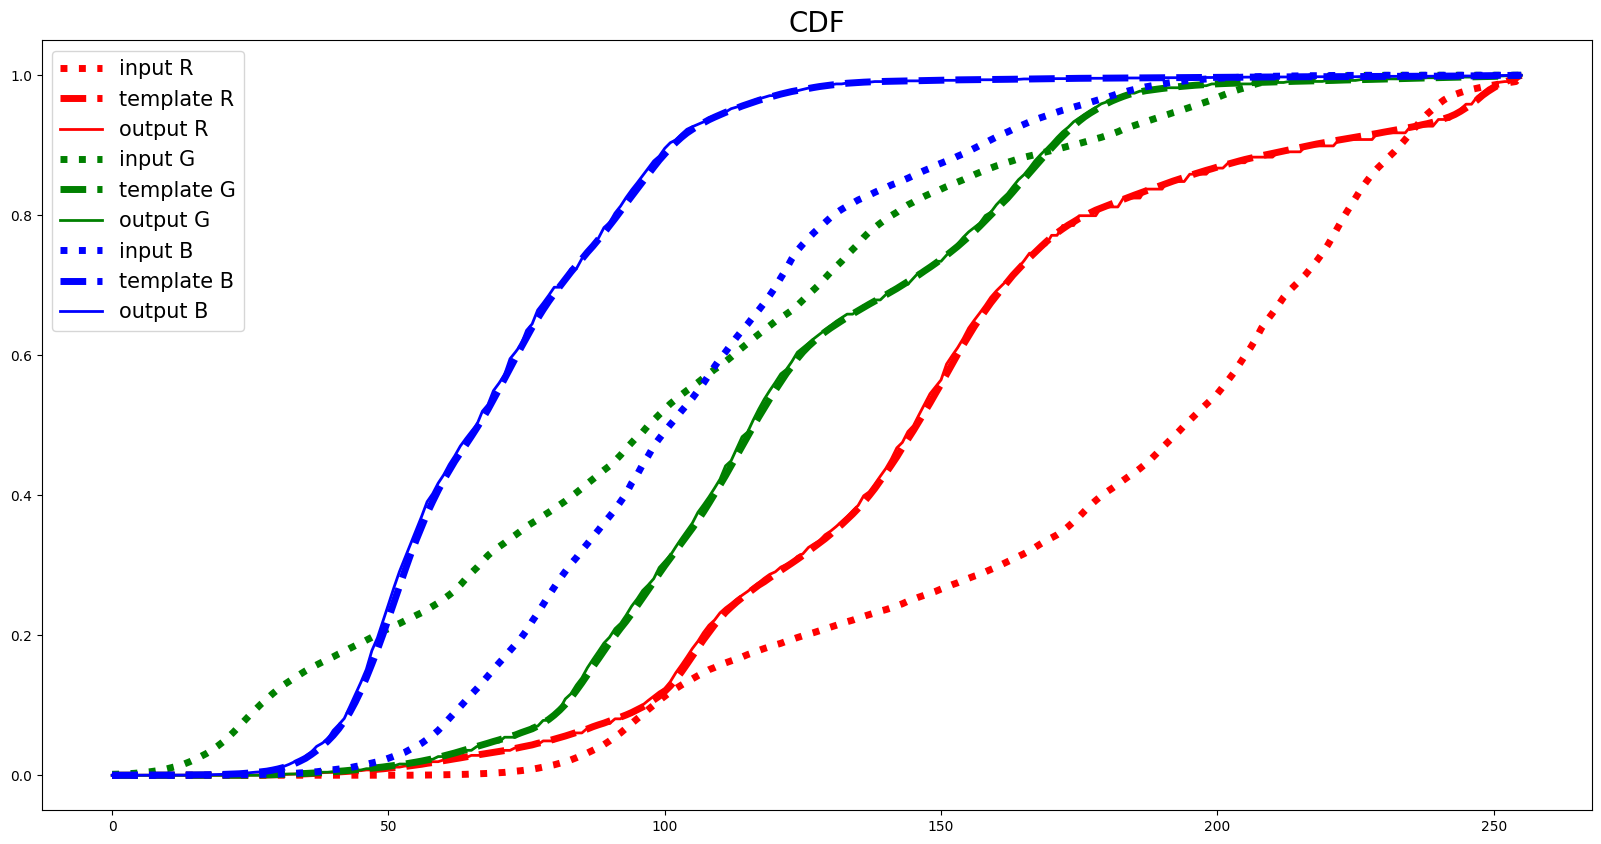

In [ ]:
# Đọc ảnh đầu vào và ảnh mẫu
im = imread('../images/lena.jpg')                       
im_t = imread('../images/apple.png')
im1 = np.zeros(im.shape).astype(np.uint8)
# Tạo biểu đồ với kích thước 20x10 inch
plt.figure(figsize=(20,10))                             
# Lặp qua các kênh màu (R, G, B) của ảnh đầu vào và ảnh mẫu
for i in range(3):                                      
    # Tính toán CDF của các kênh màu của ảnh đầu vào (c), ảnh mẫu (c_t) và ảnh đầu ra (c1)
    c = cdf(im[...,i])
    c_t = cdf(im_t[...,i])
    im1[...,i] = hist_matching(c, c_t, im[...,i])
    # Khớp histogram của ảnh đầu vào với ảnh mẫu và lưu kết quả vào im1
    c1 = cdf(im1[...,i])
    col = 'r' if i == 0 else ('g' if i == 1 else 'b')
    plt.plot(np.arange(256), c, col + ':', label='input ' + col.upper(), linewidth=5)
    plt.plot(np.arange(256), c_t, col + '--', label='template ' + col.upper(), linewidth=5)
    plt.plot(np.arange(256), c1, col + '-', label='output ' + col.upper(), linewidth=2)
# Vẽ đồ thị CDF của các kênh màu của ảnh đầu vào, ảnh mẫu và ảnh đầu ra    
plt.title('CDF', size=20)
plt.legend(prop={'size': 15})
# Lưu đồ thị CDF thành file cdf_plot.png
plt.savefig('cdf_plot.png', bbox_inches='tight')
plt.show()

#### 5. Lưu và hiển thị ảnh đầu ra

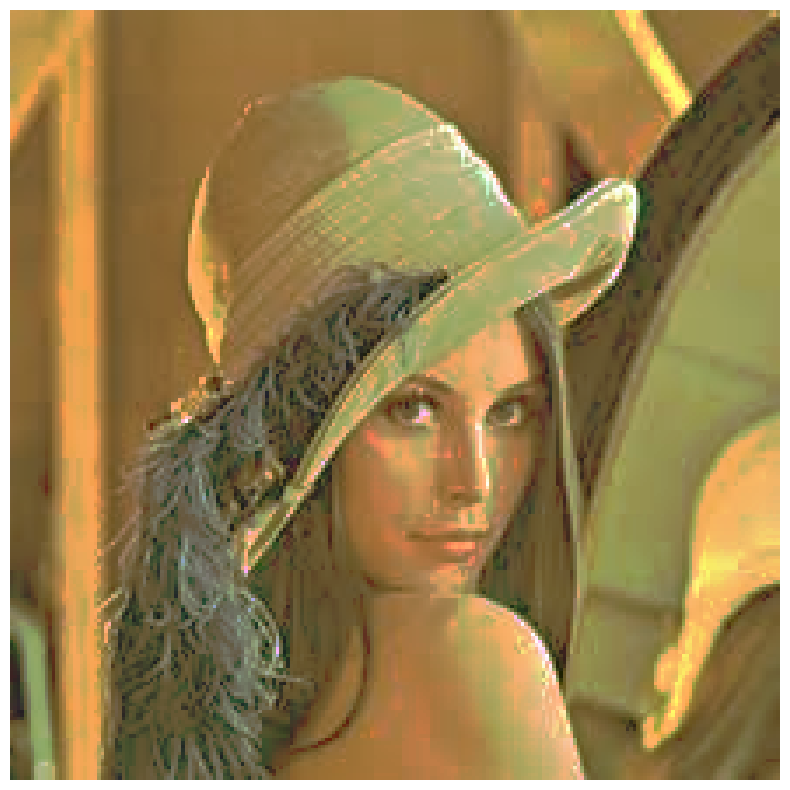

In [ ]:
# Tạo một hình ảnh với kích thước 10x10 inch
plt.figure(figsize=(10,10))                            
# Lưu ảnh đầu ra im1 thành file hist_matched.png
imsave('hist_matched.png', im1)                 
# Hiển thị ảnh đầu ra im1 và tắt các trục tọa độ
plt.imshow(im1[...,:3])                         
plt.axis('off')
plt.show()